# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data. 
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?


In [315]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [316]:
# Provide your answers here
data = pd.read_csv("hotel_reviews.csv")
print(data.shape)
print(type(data))

(20491, 2)
<class 'pandas.core.frame.DataFrame'>


dataset contains 20491 records, each record has 2 features

In [317]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


204891 records with 2 features

In [318]:
print(len(data['Review'].unique()))
print(len(data['Rating'].unique()))

20491
5


Each "review" is a distinct value. There're 5 classes in "rating" from 1 to 5.

2. Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.


In [319]:
from collections import Counter
import matplotlib.pyplot as plt

In [320]:
# Provide your answers here
# take top 10 common words in the "Review" after splitting words by space
top_words  = Counter(" ".join(data['Review']).split()).most_common(10)
top_words, top_word_counts = zip(*top_words)

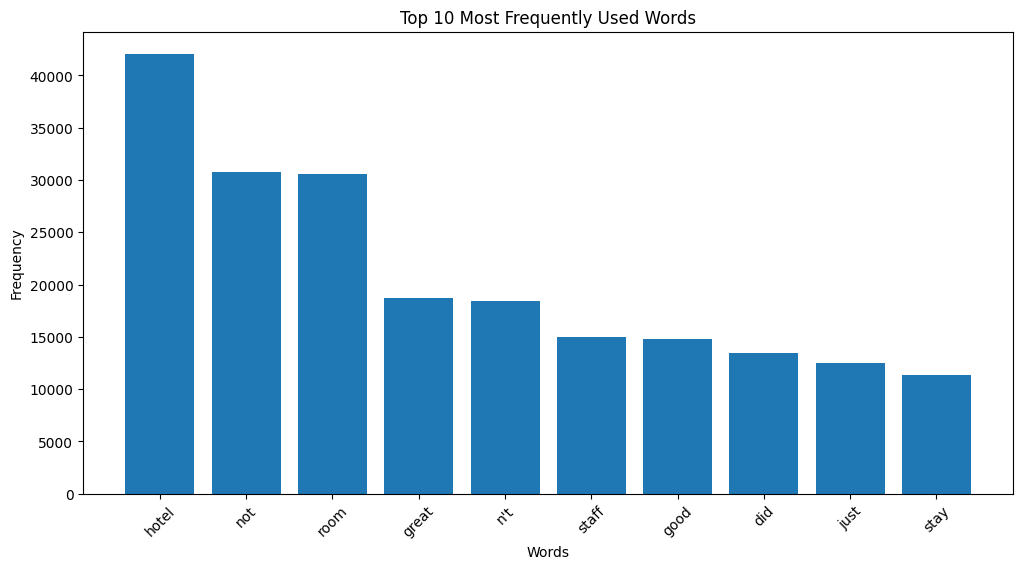

In [321]:
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words')
plt.xticks(rotation=45)
plt.show()

The word Hotel has the highest frequency



3. Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.

In [322]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [323]:
# Provide your answers here
# create a list of stop words
stop_words = set(stopwords.words('english'))

In [324]:
# Create lists of stop words and non-stop words in our text
top_non_stop_words = []
top_non_stop_word_counts = []

In [325]:
# set k = 0 initially, if k = 10, that means we only care about 10 most frequent words
k = 0
for word, count in Counter(" ".join(data['Review']).split()).most_common():
    # if the word is in the alphabet
    if word.lower() not in stop_words and word.isalpha() and k < 10:
        # add to the lists
        top_non_stop_words.append(word)
        top_non_stop_word_counts.append(count)
        k = k + 1

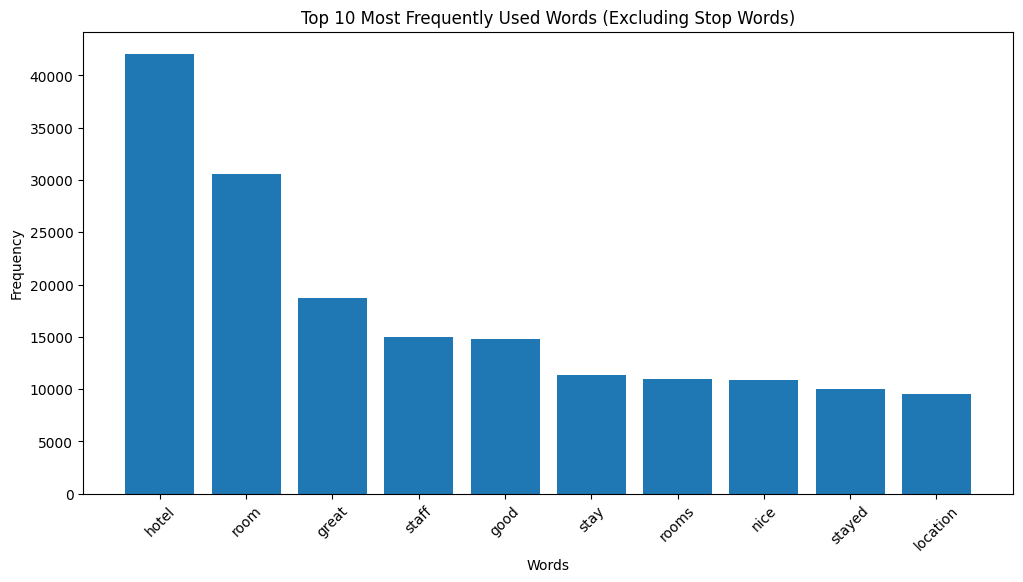

In [326]:
plt.figure(figsize=(12, 6))
plt.bar(top_non_stop_words, top_non_stop_word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words (Excluding Stop Words)')
plt.xticks(rotation=45)
plt.show()


The word Hotel has the highest frequency, some stop words like "n't" or "did" were eliminated

## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [327]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    return text

In [328]:
# Provide your answers here
# clean the data by applying the function above
data['Review'] = data['Review'].apply(clean_data)

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
# Provide your answers here
# set the input and output for our model wirh Review as input and Rating as output
X = data['Review']
Y = data['Rating']

# split the data 80% for train, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary. 

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [331]:
import copy

In [332]:
# Provide your answers here
# mapping the output to only 2 values 1 and -1
y_train_binary = copy.deepcopy(y_train).map({4: 1, 5: 1, 1: -1, 2: -1, 3: -1})
y_test_binary = copy.deepcopy(y_test).map({4: 1, 5: 1, 1: -1, 2: -1, 3: -1})

In [333]:
print("y_train_binary:")
print(y_train_binary.head())

print("\ny_test_binary:")
print(y_test_binary.head())

y_train_binary:
11710    1
10444    1
19183    1
14261    1
1989     1
Name: Rating, dtype: int64

y_test_binary:
10726   -1
14919    1
19098   -1
2450     1
960      1
Name: Rating, dtype: int64



- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [334]:
from sklearn.feature_extraction.text import CountVectorizer

# Provide your answers here
# usinge CountVectorizer to transform the inputs
count_vectorizer = CountVectorizer(stop_words='english')
train_data_BOW = count_vectorizer.fit_transform(X_train)
test_data_BOW = count_vectorizer.transform(X_test)

print(train_data_BOW.shape)
print(test_data_BOW.shape)

(16392, 45830)
(4099, 45830)


In [335]:
X_train

11710    outstanding cleanliness value location wanted ...
10444    cheap cheerful hey not sure fuss picked hotel ...
19183    sensational hotel stayed hotel renew 2 10 nove...
14261    nice spent 3 nights easter nice little hotel f...
1989     overall good experience enjoyed staying hotel ...
                               ...                        
11284    worth money no complaints place beautiful  sta...
11964    stellar experience stayed night pleasantly sur...
5390     best location town aquarium  soon enter hotel ...
860      amazing place amazing location amazing food  p...
15795    loved want  hotel fantastic  stayed season hot...
Name: Review, Length: 16392, dtype: object

In [336]:
print(train_data_BOW)

  (0, 29194)	2
  (0, 9184)	1
  (0, 43412)	1
  (0, 24413)	3
  (0, 44196)	1
  (0, 38668)	1
  (0, 8245)	1
  (0, 24522)	4
  (0, 24801)	3
  (0, 37033)	3
  (0, 20445)	2
  (0, 16279)	1
  (0, 35981)	1
  (0, 3983)	1
  (0, 8575)	1
  (0, 34401)	1
  (0, 41939)	2
  (0, 2498)	1
  (0, 11774)	1
  (0, 6712)	1
  (0, 8296)	1
  (0, 13017)	1
  (0, 20845)	1
  (0, 36756)	1
  (0, 44123)	1
  :	:
  (16391, 32399)	1
  (16391, 38516)	1
  (16391, 29980)	1
  (16391, 27480)	1
  (16391, 36481)	1
  (16391, 30087)	1
  (16391, 35351)	1
  (16391, 2725)	1
  (16391, 38115)	1
  (16391, 41037)	1
  (16391, 30777)	1
  (16391, 25548)	1
  (16391, 34514)	1
  (16391, 30391)	1
  (16391, 44700)	1
  (16391, 28017)	1
  (16391, 44501)	1
  (16391, 11253)	1
  (16391, 12418)	1
  (16391, 44305)	1
  (16391, 20181)	1
  (16391, 44636)	1
  (16391, 4535)	1
  (16391, 40684)	1
  (16391, 19621)	1


- Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Provide your answers here
# same as CountVectorizer, but now we're using Tf-idf algorithm
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
train_data_tfidf = tfidf_vectorizer.fit_transform(X_train)
test_data_tfidf = tfidf_vectorizer.transform(X_test)

print(train_data_tfidf.shape)
print(test_data_tfidf.shape)

(16392, 45830)
(4099, 45830)


## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Linear Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Linear Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Linear Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

In [338]:
from sklearn.linear_model import LogisticRegression

# Provide your answers here
# using BOW to fit our Logistic model
model1 = LogisticRegression()
model1.fit(train_data_BOW, y_train)

# using the TfIdf
model2 = LogisticRegression()
model2.fit(train_data_tfidf, y_train)

# using the TfIdf for binary labels
model3 = LogisticRegression()
model3.fit(train_data_tfidf, y_train_binary)

LogisticRegression()

In [339]:
print(model1.predict(test_data_BOW))
print(model2.predict(test_data_tfidf))
print(model3.predict(test_data_tfidf))

[1 4 3 ... 3 5 5]
[1 4 3 ... 3 5 5]
[-1  1 -1 ... -1  1  1]



## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 (Linear Regression with BoW representation) and Model 2 (Linear Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).

In [340]:
from sklearn.metrics import accuracy_score

# Provide your answers here
# using accuracy_score to calculate the accuracy between true values Y_text 
# and predicted values from our models
accuracy_model1 = accuracy_score(y_test, model1.predict(test_data_BOW))
accuracy_model2 = accuracy_score(y_test, model2.predict(test_data_tfidf))


In [341]:
print("Test Accuracy (Model 1 - Bag of Words):", accuracy_model1)
print("Test Accuracy (Model 2 - TfIdf):", accuracy_model2)

if accuracy_model1 > accuracy_model2:
    print("Bag of Words representation yields higher performance.")
elif accuracy_model1 < accuracy_model2:
    print("TfIdf representation yields higher performance.")
else:
    print("Both representations have the same test accuracy.")

Test Accuracy (Model 1 - Bag of Words): 0.595023176384484
Test Accuracy (Model 2 - TfIdf): 0.6272261527201757
TfIdf representation yields higher performance.


- Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [342]:
# Provide your answers here
accuracy_model2 = accuracy_score(y_test, model2.predict(test_data_tfidf))
accuracy_model3 = accuracy_score(y_test_binary, model3.predict(test_data_tfidf))

print("Test Accuracy (Model 2 - Hotel Ratings):", accuracy_model2)
print("Test Accuracy (Model 3 - Binary Sentiment):", accuracy_model3)

if accuracy_model2 > accuracy_model3:
    print("Predicting hotel ratings is easier.")
elif accuracy_model2 < accuracy_model3:
    print("Predicting binary sentiment is easier.")
else:
    print("Both tasks have similar test accuracy.")

Test Accuracy (Model 2 - Hotel Ratings): 0.6272261527201757
Test Accuracy (Model 3 - Binary Sentiment): 0.9016833373993657
Predicting binary sentiment is easier.


Predicting binary sentiment (positive or negative) is simpler than predicting sentiment on a scale of 1 to 5 because it involves only two classes, making it easier to achieve higher accuracy.



- For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

Confusionmatrix for Model 2:
 [[ 174   72   12   13   21]
 [  32  132   66   64   39]
 [   9   56   99  205   63]
 [   4   16   44  636  552]
 [   2    3    3  252 1530]]

Classification Report (Model 2 - Hotel Ratings):
               precision    recall  f1-score   support

           1       0.79      0.60      0.68       292
           2       0.47      0.40      0.43       333
           3       0.44      0.23      0.30       432
           4       0.54      0.51      0.53      1252
           5       0.69      0.85      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.59      0.52      0.54      4099
weighted avg       0.61      0.63      0.61      4099



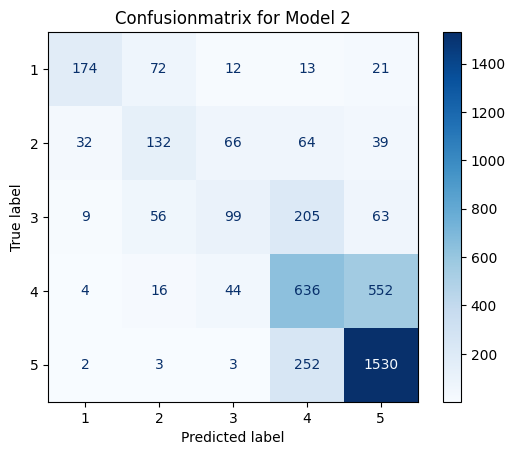

In [343]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Provide your answers here

# confusion matrix for Model 2
cm_model2 = confusion_matrix(y_test, model2.predict(test_data_tfidf))
print("Confusionmatrix for Model 2:\n", cm_model2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_model2, display_labels=model2.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusionmatrix for Model 2")

# classification report for Model 2
classification_report_model2 = classification_report(y_test, model2.predict(test_data_tfidf))

# Print the classification report
print("\nClassification Report (Model 2 - Hotel Ratings):\n", classification_report_model2)

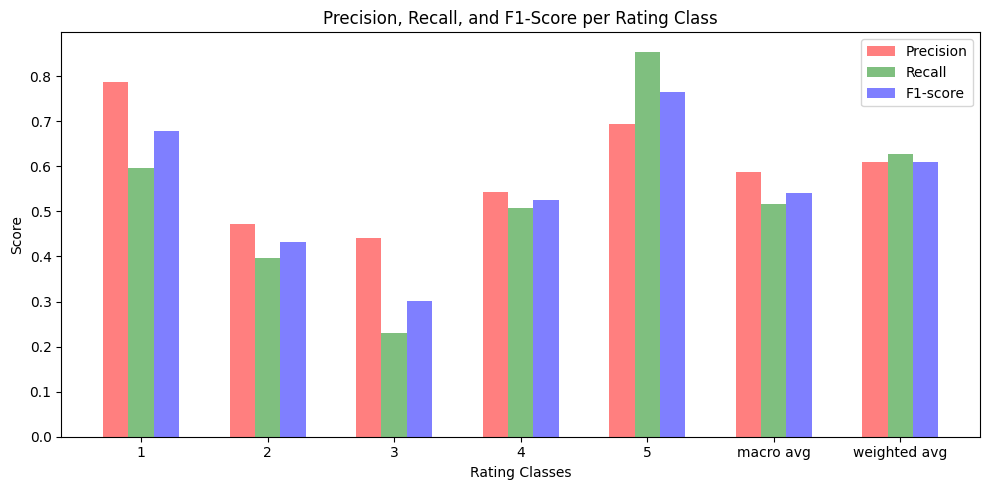

In [344]:
# classification_report_model2
report = classification_report(y_test, model2.predict(test_data_tfidf), target_names=['1', '2', '3', '4', '5'], output_dict=True)

# Extract precision, recall, and f1-score
precision = [report[class_name]['precision'] for class_name in report.keys() if class_name != 'accuracy']
recall = [report[class_name]['recall'] for class_name in report.keys() if class_name != 'accuracy']
f1_score = [report[class_name]['f1-score'] for class_name in report.keys() if class_name != 'accuracy']
classes = [class_name for class_name in report.keys() if class_name != 'accuracy']

# Create subplots for precision, recall, and f1-score
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.2
index = range(len(classes))

plt.bar(index, precision, bar_width, alpha=0.5, color="red", label='Precision')
plt.bar([i + bar_width for i in index], recall, bar_width, alpha=0.5, color="green", label='Recall')
plt.bar([i + 2 * bar_width for i in index], f1_score, bar_width, alpha=0.5, color="blue", label='F1-score')

plt.xlabel('Rating Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Rating Class')
plt.xticks([i + bar_width for i in index], classes)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- Confusion Matrix Analysis:
We can see that the model is better at predicting higher ratings (4 and 5) than lower ratings (1 and 2).
Misclassifications occur, especially between adjacent ratings.

- Classification Report Analysis:
Precision is highest for rating 1 (0.79), recall is highest for rating 5 (0.85).
The model's overall accuracy is 63%.

## Task 5: Model Analysis



- Based on the confusion matrix obtained in the previous question (referring to Model 2, the Linear Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

**Provide your answer here** 
<br><b>Based on the confusion matrix about, there're 21 samples which are rating 1 but these were predicted rating 5 from my model.</b></br>


- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.

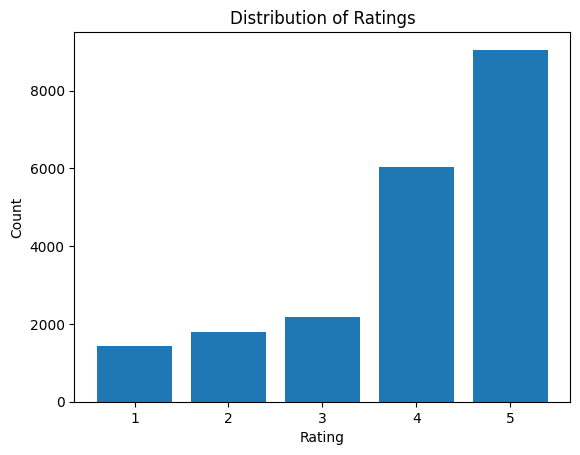

In [345]:
rating_counts = data['Rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)

# Label the axes and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

We can see that our dataset is imbalanced. The number of rating 5 records are much higher than others.

- Accuracy: Accuracy is the ratio of correctly predicted instances to the total instances. It is a straightforward metric and often used as the default. However, accuracy can be misleading in imbalanced datasets.
  - $Accuracy$ = $\frac{TP + TN}{TP+FP+TN+FN}$
- Precision: measures the ratio of true positive predictions to the total positive predictions made by the model. Higher precision for low ratings (1) suggests high accuracy when predicting them.
  - $Precision$ = $\frac{TP}{TP+FP}$
- Recall: also known as sensitivity or true positive rate, measures the ratio of true positive predictions to the actual positive instances in the dataset. Higher recall for high ratings (5) indicates good detection of these ratings.
  - $Recall$ = $\frac{TP}{TP+FN}$
- A trade-off exists: Improving one (e.g., precision) may lower the other (e.g., recall).
- My decision: Depends on the specific task we prefer optimising precision or recall. In this task, I choose F1 score because it balances precision and recall. Moreover, it's especially useful in scenarios where class imbalance or the cost of errors is a concern.
  - $F1\_score$ = $\frac{2 . precision . recall}{precision + recall}$

**Provide your answer here**



- For binary sentiment prediction (Model 3), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [346]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

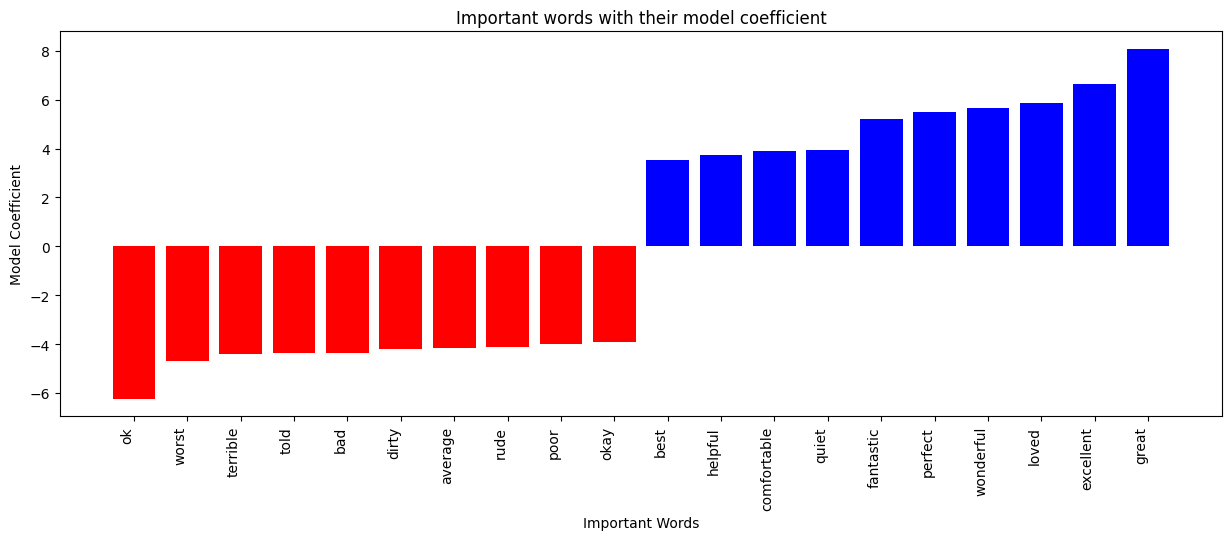

In [347]:
plot_coefficients(model3, count_vectorizer.get_feature_names_out())

- "ok" is the most important word for negative predicted output (-1 or low rating) 
- "great" is the most important word for positive predicted output (1 or high rating)